In [3]:
import psycopg2 as pg
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.finance import candlestick2_ochl, candlestick2_ohlc
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY
import seaborn as sns
import yaml
%matplotlib inline

In [4]:
stream = open('config.yaml', 'r')
conf = yaml.load(stream)

In [5]:
conn = pg.connect(host=conf['host'], database=conf['database'], user=conf['username'], password=conf['password'])

# Individual Stock Analysis

## Trend of ICICIBANK

In [6]:
_ = ("SELECT * FROM finance_app_nsestockquote " 
        "WHERE symbol = '{0}'").format('ICICIBANK')

icici_bank_df = pd.read_sql_query(_, conn)
icici_bank_df.index = icici_bank_df.scriptdate

In [7]:
icici_bank_df.tail()

,id,symbol,scriptdate,series,open,high,low,close,totaltradeqty,totaltrades,isin,last,prevclose,totaltradevalue
scriptdate,,,,,,,,,,,,,,
2017-03-29 00:00:00+00:00,106383,ICICIBANK,2017-03-29 00:00:00+00:00,EQ,278.95,282.80,276.65,282.20,17191675.0,84577.0,INE090A01021,282.30,277.00,4.821411e+09
2017-03-30 00:00:00+00:00,108133,ICICIBANK,2017-03-30 00:00:00+00:00,EQ,281.25,283.25,279.75,281.35,15039119.0,116354.0,INE090A01021,281.00,282.20,4.234769e+09
2017-03-31 00:00:00+00:00,109861,ICICIBANK,2017-03-31 00:00:00+00:00,EQ,280.35,282.90,275.70,276.85,17947183.0,79199.0,INE090A01021,276.35,281.35,4.997959e+09
2017-04-03 00:00:00+00:00,111595,ICICIBANK,2017-04-03 00:00:00+00:00,EQ,278.80,287.40,276.85,286.70,18590561.0,85754.0,INE090A01021,286.65,276.85,5.274436e+09
2017-04-05 00:00:00+00:00,113364,ICICIBANK,2017-04-05 00:00:00+00:00,EQ,286.50,286.50,282.90,284.85,9608663.0,83961.0,INE090A01021,284.95,286.70,2.736061e+09


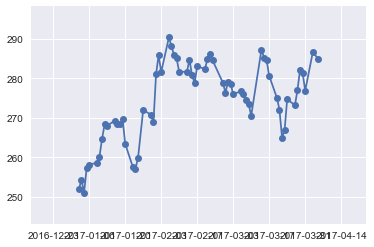

In [8]:
plt.margins(0.2)
plt.plot(icici_bank_df['close'], marker='o') #, linestyle='none')

In [9]:
icici_bank_df.columns

Index([u'id', u'symbol', u'scriptdate', u'series', u'open', u'high', u'low',
       u'close', u'totaltradeqty', u'totaltrades', u'isin', u'last',
       u'prevclose', u'totaltradevalue'],
      dtype='object')

## OCHL Chart of ICICIBANK

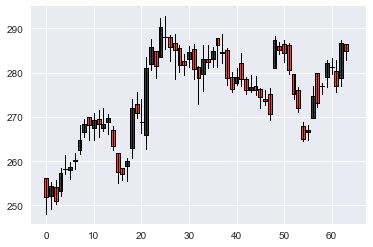

In [10]:
fig, ax = plt.subplots()
#ax.xaxis.set_major_locator(WeekdayLocator(MONDAY))
#ax.xaxis.set_minor_locator(DayLocator())
#ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
candlestick2_ochl(ax, icici_bank_df['open'], icici_bank_df['close'], icici_bank_df['high'], icici_bank_df['low'], width=0.8)
#ax.xaxis_date()
#ax.autoscale_view()
#plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

# Day wise Analysis (2017-04-05)

## Total trade quantity

In [11]:
# cur.execute("insert into %s values (%s, %s)", [table_name, 10, 20])
_ = ("SELECT symbol, totaltradeqty FROM finance_app_nsestockquote " 
        "WHERE scriptdate = '{0}'").format('2017-04-05 00:00:00+00:00')

total_trade_df = pd.read_sql_query(_, conn)
total_trade_df.describe()

,totaltradeqty
count,1.766000e+03
mean,8.630471e+05
std,2.935251e+06
min,1.000000e+00
25%,1.260100e+04
50%,9.140900e+04
75%,5.121892e+05
max,6.732855e+07


## Top 10 most traded stocks

In [12]:
total_trade_df = total_trade_df.sort_values(by=['totaltradeqty'], ascending=False)
total_trade_df.head(10)

,symbol,totaltradeqty
1662,UNITECH,67328547.0
783,JPASSOCIAT,45823011.0
1547,SUZLON,28645270.0
1282,RCOM,23998485.0
1371,SBIN,21936647.0
1403,SHANKARA,20556468.0
1460,SOUTHBANK,19419091.0
642,IDEA,19204564.0
643,IDFC,19140138.0
1332,RTNINFRA,18248441.0
